# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

In this lab you will: 

- Use a log transformation to minimize non-stationarity 
- Use rolling means to reduce non-stationarity 
- Use differencing to reduce non-stationarity 
- Use rolling statistics as a check for stationarity 
- Create visualizations of transformed time series as a visual aid to determine if stationarity has been achieved 
- Use the Dickey-Fuller test and conclude whether or not a dataset is exhibiting stationarity 


## Detrending the Air passenger data 

In this lab you will work with the air passenger dataset available in `'passengers.csv'`. First, run the following cell to import the necessary libraries. 

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

- Import the `'passengers.csv'` dataset 
- Change the data type of the `'Month'` column to a proper date format 
- Set the `'Month'` column as the index of the DataFrame 
- Print the first five rows of the dataset 

In [13]:
# Import 'passengers.csv' dataset
data = pd.read_csv('passengers.csv')

# Change the data type of the 'Month' column
data['Month'] = pd.to_datetime(data['Month'])

# Set the 'Month' column as the index
ts = data.set_index('Month')

# Print the first five rows
ts.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Plot this time series. 

<AxesSubplot:xlabel='Month'>

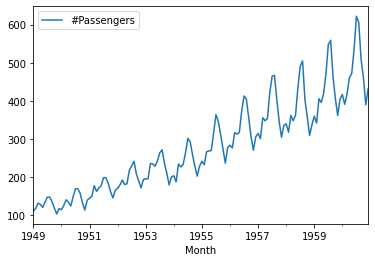

In [14]:
# Plot the time series
ts.plot()

## Create a stationarity check

Your next task is to use the code from previous labs to create a function `stationarity_check()` that takes in a time series and performs stationarity checks including rolling statistics and the Dickey-Fuller test. 

We want the output of the function to: 

- Plot the original time series along with the rolling mean and rolling standard deviation (use a window of 8) in one plot 
- Output the results of the Dickey-Fuller test 

In [27]:
# Create a function to check for the stationarity of a given time series using rolling stats and DF test
# Collect and package the code from previous labs
from statsmodels.tsa.stattools import adfuller

def stationarity_check(data):
    roll_mean = data.rolling(window=8, center=False).mean()
    roll_std = data.rolling(window=8, center=False).std()
    
    fig = plt.figure(figsize=(14,6))
    plt.plot(data, color='black', label='Original')
    plt.plot(roll_mean, color='green', label='Mean')
    plt.plot(roll_std, color = 'blue', label='Standard Dev')
    plt.legend(loc='best')
    plt.plot()
    
    dftest = adfuller(data)
    print('Test Statistic: ' , dftest[0])
    print('p-value: ' , dftest[1])
    print('#Lags Used: ' , dftest[2])
    print('Number of Observations Used: ', dftest[3])

Use your newly created function on the `ts` timeseries. 

Test Statistic:  0.8153688792060442
p-value:  0.9918802434376409
#Lags Used:  13
Number of Observations Used:  130


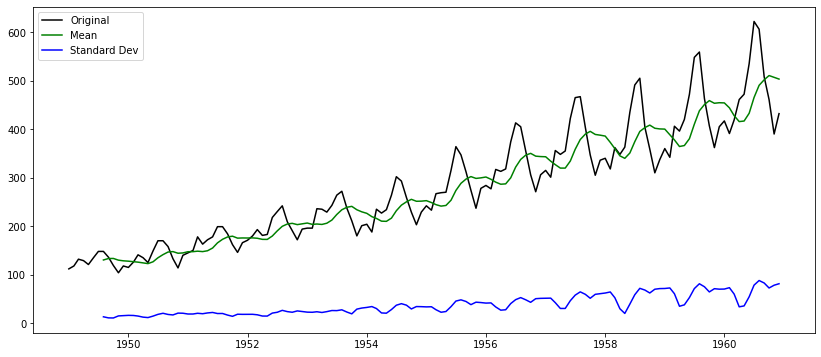

In [28]:
stationarity_check(ts)

## Perform a log and square root transform

Plot a log transform of the original time series (`ts`). 

<AxesSubplot:xlabel='Month'>

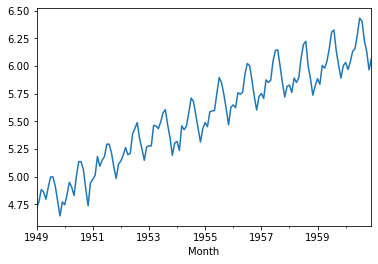

In [42]:
# Plot a log transform
ts_log = np.log(ts['#Passengers'])
ts_log.plot()

Plot a square root  transform of the original time series (`ts`). 

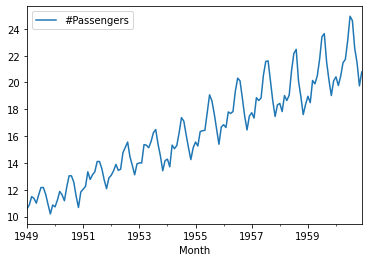

In [44]:
# Plot a square root transform
ts_sqrt = np.sqrt(ts)
ts_sqrt.plot();

Going forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

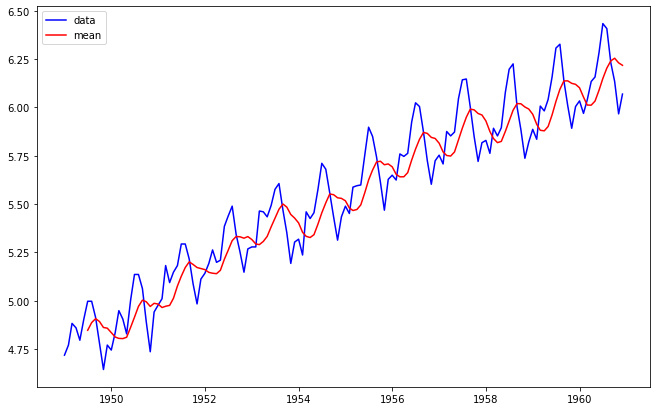

In [34]:
# your code here
roll_mean = ts_log.rolling(window=7).mean()
fig = plt.figure(figsize=(11,7)) 
plt.plot(ts_log, color='blue', label='data')
plt.plot(roll_mean, color='red', label='mean')
plt.legend()
plt.show();

Now, subtract this rolling mean from the log transformed time series, and look at the 10 first elements of the result.  

In [35]:
# Subtract the moving average from the log transformed data
data_minus_roll_mean = ts_log - roll_mean

# Print the first 10 rows
data_minus_roll_mean.head(10)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01    0.150059
1949-08-01    0.110242
1949-09-01    0.005404
1949-10-01   -0.113317
Name: #Passengers, dtype: float64

Drop the missing values from this time series. 

In [36]:
# Drop the missing values
data_minus_roll_mean.dropna(inplace=True)

Plot this time series now. 

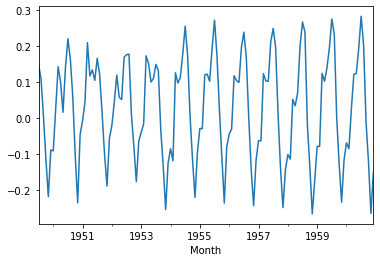

In [40]:
# Plot the result
data_minus_roll_mean.plot();

Finally, use your function `check_stationarity()` to see if this series is stationary!

Test Statistic:  -2.3480270028587893
p-value:  0.15694559814097309
#Lags Used:  14
Number of Observations Used:  123


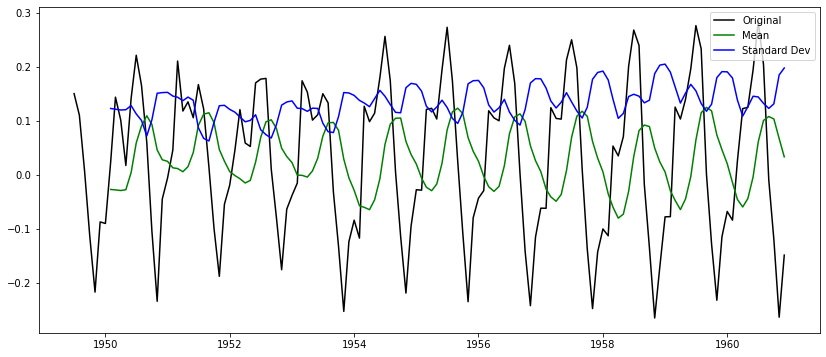

In [38]:
stationarity_check(data_minus_roll_mean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [ ]:
# Variance and mean still not consistent enough based on graph
# p-value to high to reject null hypothesis that data is stationary

## Subtracting the weighted rolling mean

Repeat all the above steps to calculate the exponential *weighted* rolling mean with a halflife of 4. Start from the log-transformed data again. Compare the Dickey-Fuller test results. What do you conclude?

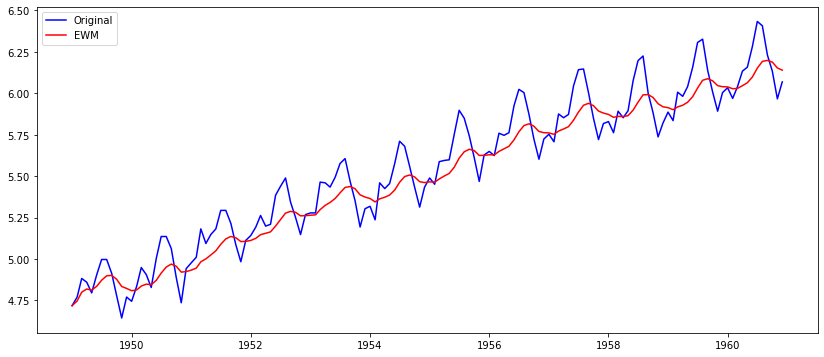

In [50]:
# Calculate Weighted Moving Average of log transformed data
exp_roll_mean = ts_log.ewm(halflife=4).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(14,6))

plt.plot(ts_log, color='blue', label='Original')
plt.plot(exp_roll_mean, color='red', label='EWM')
plt.legend()
plt.show();

- Subtract this exponential weighted rolling mean from the log transformed data  
- Print the resulting time series 

<AxesSubplot:xlabel='Month'>

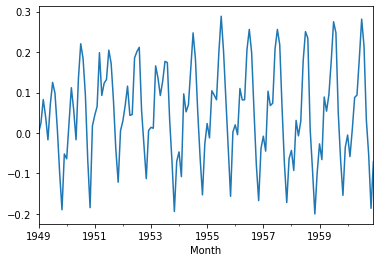

In [51]:
# Subtract the exponential weighted rolling mean from the original data 
data_minus_exp_roll_mean = ts_log - exp_roll_mean

# Plot the time series
data_minus_exp_roll_mean.plot()

Check for stationarity of `data_minus_exp_roll_mean` using your function. 

Test Statistic:  -3.297250322037509
p-value:  0.015001833471826004
#Lags Used:  13
Number of Observations Used:  130


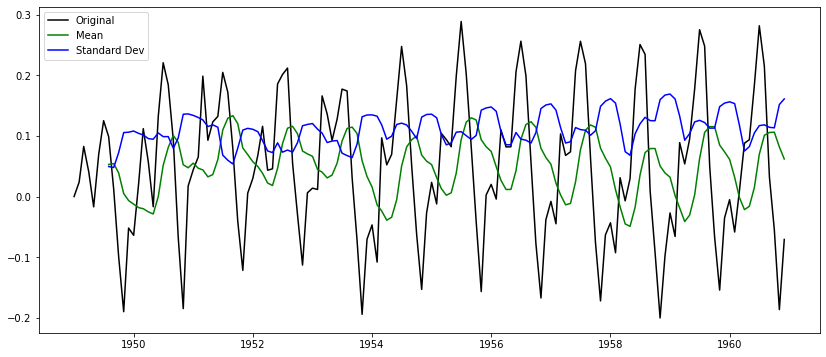

In [52]:
stationarity_check(data_minus_exp_roll_mean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [ ]:
# Based on the p-value, we can conclude this data is stationary

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, drop the missing values, plot the resulting time series, and then run the `stationarity check()` again.

In [60]:
# Difference your data
data_diff = data_minus_exp_roll_mean.diff(periods=12)

# Drop the missing values
data_diff.dropna(inplace=True)

# Check out the first few rows
data_diff.head(15)

Month
1950-01-01   -0.063907
1950-02-01   -0.001185
1950-03-01    0.029307
1950-04-01    0.016168
1950-05-01    0.000194
1950-06-01    0.062669
1950-07-01    0.095524
1950-08-01    0.085827
1950-09-01    0.081834
1950-10-01    0.032363
1950-11-01    0.005065
1950-12-01    0.069320
1951-01-01    0.107890
1951-02-01    0.042702
1951-03-01    0.086617
Name: #Passengers, dtype: float64

Plot the resulting differenced time series. 

<AxesSubplot:xlabel='Month'>

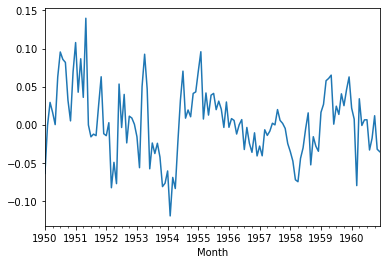

In [61]:
# Plot your differenced time series
data_diff.plot()

Test Statistic:  -3.601666483538015
p-value:  0.005729247969742392
#Lags Used:  12
Number of Observations Used:  119


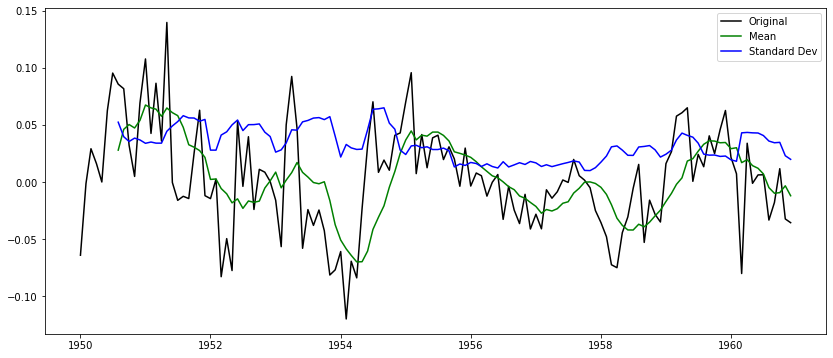

In [62]:
# Perform the stationarity check
stationarity_check(data_diff)

### Your conclusion

In [ ]:
"""
Even though the rolling mean and rolling average lines do seem to be fluctuating, the movements seem to be 
completely random, and the same conclusion holds for the original time series. Your time series is now ready 
for modeling!
"""

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means, and differencing.